## Mushroom data analysis

## Helper Libraries

In [357]:
# Import libraries
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

## Dataframe, Variables, and Splitting Setup

In [354]:
data=pd.read_csv("mushrooms.csv")

In [329]:
# This dataset contains 8124 observations and 23 features
data.shape

(8124, 23)

In [ ]:
# The whole features are catogrical including the target variable. We have binary claasification, either the mushroom is poisonous or edible.
data.head()

In [ ]:
# The data set has no missing values
data.isnull().sum()

In [ ]:
# check the uniques values of each feature
for i in data.columns:
  print(i, data[i].unique())

In [355]:
# Here we have deleted one of the columns that has no connection with the rest of the data.
data.drop(['veil-type'], axis=1, inplace=True)

In [333]:
def plot_col(col, hue=None, color=['red', 'lightgreen'], labels=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(col, hue=hue, palette=color, saturation=0.6, data=data, dodge=True, ax=ax)
    ax.set(title = f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")
    if labels!=None:
        ax.set_xticklabels(labels)
    if hue!=None:
        ax.legend(('Poisonous', 'Edible'), loc=0)

In [ ]:
# We have approximate balance values of the target variable
class_dict = ('Poisonous', 'Edible')
plot_col(col='class', labels=class_dict)

In [347]:
print(data.groupby('class').size())

class
e    4208
p    3916
dtype: int64


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


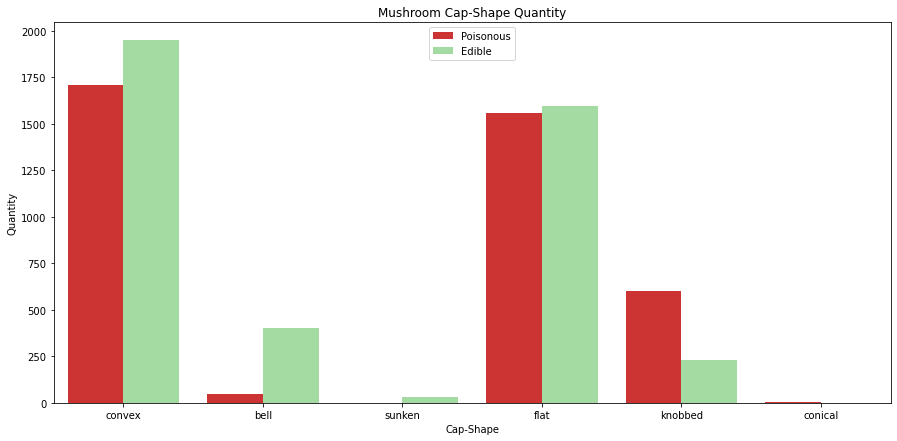

In [348]:
# Draw diffrent cap variables along with target variable
shape_dict = {"bell":"b","conical":"c","convex":"x","flat":"f", "knobbed":"k","sunken":"s"}
labels = ('convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical')
plot_col(col='cap-shape', hue='class', labels=labels)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


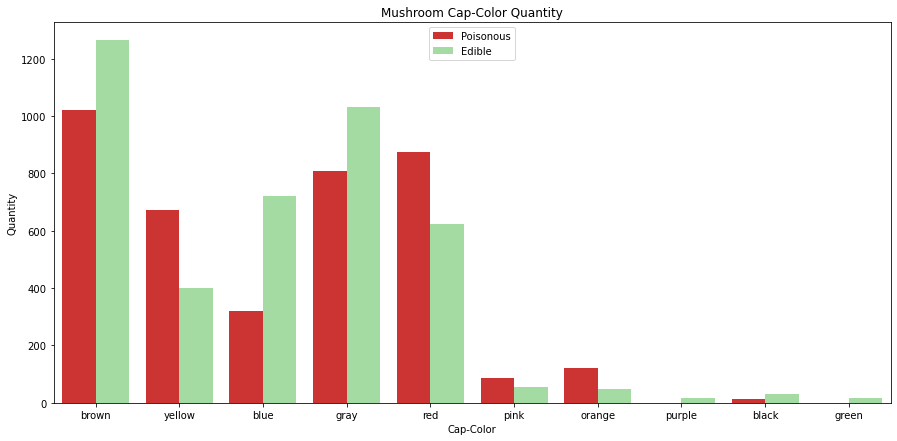

In [338]:
color_dict = {"brown":"n","yellow":"y", "blue":"w", "gray":"g", "red":"e","pink":"p",
              "orange":"b", "purple":"u", "black":"c", "green":"r"}
plot_col(col='cap-color', hue='class', labels=color_dict)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


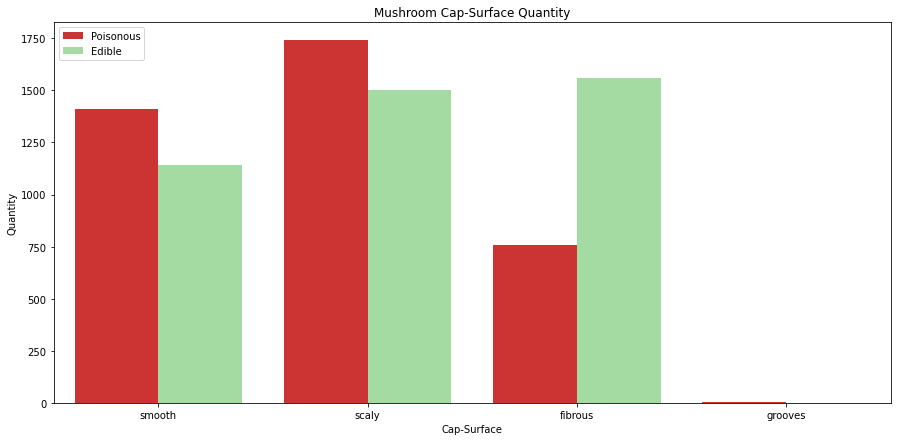

In [340]:
surface_dict = {"smooth":"s", "scaly":"y", "fibrous":"f","grooves":"g"}
plot_col(col='cap-surface', hue='class', labels=surface_dict)

In [341]:
def get_labels(order, a_dict):    
    labels = []
    for values in order:
        for key, value in a_dict.items():
            if values == value:
                labels.append(key)
    return labels

In [342]:
# Mushroom Population & Habitat Percentage
pop_dict = {"abundant":"a","clustered":"c","numerous":"n","scattered":"s","several":"v","solitary":"y"}
hab_dict = {"grasses":"g","leaves":"l","meadows":"m","paths":"p","urban":"u","waste":"w","woods":"d"}

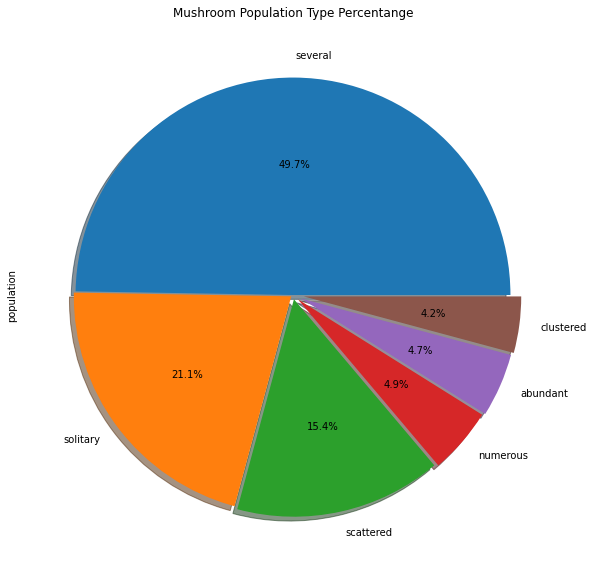

In [343]:
f, ax = plt.subplots(figsize=(15, 10))
order = list(data['population'].value_counts().index)
pop_labels = get_labels(order, pop_dict)
explode = (0.0,0.01,0.02,0.03,0.04,0.05)
data['population'].value_counts().plot.pie(explode=explode , autopct='%1.1f%%', labels=pop_labels, shadow=True, ax=ax)
ax.set_title('Mushroom Population Type Percentange');

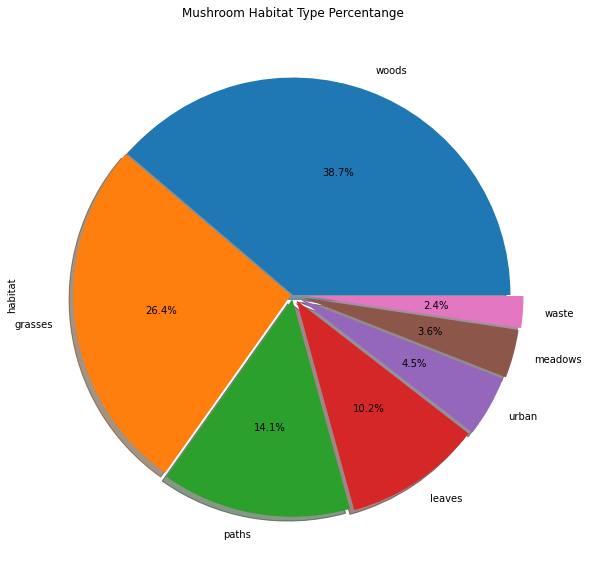

In [344]:
f, ax = plt.subplots(figsize=(15, 10))
order = list(data['habitat'].value_counts().index)
hab_labels = get_labels(order, hab_dict)
explode = (0.0,0.01,0.02,0.03,0.04,0.05, 0.06)
data['habitat'].value_counts().plot.pie(explode=explode, autopct='%1.1f%%', labels=hab_labels, shadow=True, ax=ax)
ax.set_title('Mushroom Habitat Type Percentange');

## Bulding Machine Learning Model

## Logistic Regression

In [ ]:
# Evaluate logistic regression on the Mushroom dataset with an one-hot encoding

# separate target and features columns
y= data["class"].values.astype(str)
X= data.drop(["class"],axis=1).astype(str)

# split the dataset into train and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# one-hot encode input variables
onehot_encoder = OneHotEncoder()
onehot_encoder.fit(X_train)
X_train = onehot_encoder.transform(X_train)
X_test = onehot_encoder.transform(X_test)

# encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

# define the model
model = LogisticRegression()
# fit on the training set
model.fit(X_train, y_train)

# evaluate the model
print("Test Accuracy: {}%".format(round(model.score(X_test,y_test)*100,2)))      

## K-nearest Neighbors Algorithm

In [201]:
# Evaluate KNN on the Mushroom dataset with an one-hot encoding

# separate target and features columns
y= data["class"].values.astype(str)
X= data.drop(["class"],axis=1).astype(str)

# split the dataset into train and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# one-hot encode input variables
onehot_encoder = OneHotEncoder()
onehot_encoder.fit(X_train)
X_train = onehot_encoder.transform(X_train)
X_test = onehot_encoder.transform(X_test)

# encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

# create KNN model object
knn = KNeighborsRegressor()

# define loss function
loss = 'neg_root_mean_squared_error'

# create 10 fold CV object
kfold = KFold(n_splits=10, random_state=123, shuffle=True)

# Create grid of hyperparameter values
hyper_grid = {'n_neighbors': range(2, 17)}

# Tune a knn model using grid search
grid_search = GridSearchCV(knn, hyper_grid, cv=kfold, scoring=loss)
results = grid_search.fit(X_train, y_train)


In [ ]:
# Best model's k value
results.best_estimator_.get_params().get('n_neighbors')

In [ ]:
# Cross validated grid search
from plotnine import ggplot, aes, geom_density, geom_line, geom_point, ggtitle
# Plot all RMSE results
all_rmse = pd.DataFrame({'k': range(2, 17), 
                         'RMSE': np.abs(results.cv_results_['mean_test_score'])})

(ggplot(all_rmse, aes(x='k', y='RMSE'))
 + geom_line()
 + geom_point()
 + ggtitle("Cross validated grid search results"))

In [204]:
## Build knn on the best k value and make the prdeiction & accuaracy
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

acc =  knn.score(X_test, y_test)
print("Test Accuracy: {}%".format(round(knn.score(X_test,y_test)*100,2)))
